In [57]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
from matplotlib.colors import ListedColormap

plt.style.use("fivethirtyeight") ## << optional step

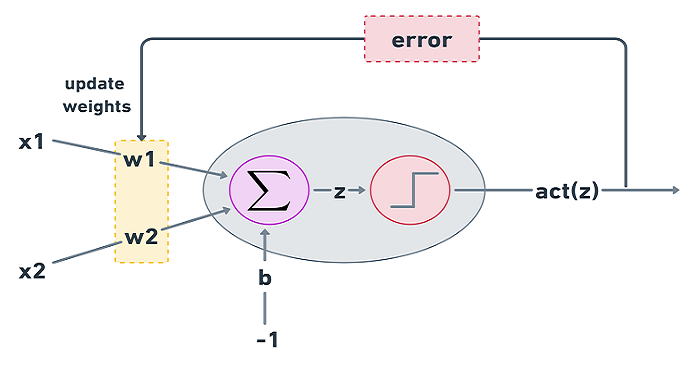

In [42]:
class Perceptron:

  def __init__(self, eta:float=None, epochs:int=None):
    self.weights = np.random.randn(3) * 1e-4 # small random weights
    training = (eta is not None) and (epochs is not None)
    if training:
      print(f"initial weight before training: \n{self.weights}\n")
    self.eta = eta
    self.epochs = epochs

  def _z_outcome(self, inputs, weights):
    return np.dot(inputs, weights)

  def activation_function(self, Z):
    return np.where(Z>0, 1, 0)

  def fit(self, X, y):
    self.X = X
    self.y = y

    X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))]
    print(f"X with bias: \n{X_with_bias}")

    for epoch in range(self.epochs):
      print("--"*10)
      print(f"for epoch >> {epoch+1}")
      print("--"*10)

      z = self._z_outcome(X_with_bias, self.weights)
      y_hat = self.activation_function(z)
      print(f"predicted value after forward pass \n{y_hat}")

      self.error = self.y - y_hat
      print(f"error: \n{self.error}")

      self.weights = self.weights + self.eta * np.dot(X_with_bias.T, self.error)
      print(f"updated weights after epoch: {epoch+1}/{self.epochs}: \n{self.weights}")
      print("##"*10)

  def predict(self, X):
    X_with_bias = np.c_[X, -np.ones((len(X), 1))]
    z = self._z_outcome(X_with_bias, self.weights)
    return self.activation_function(z)

  def total_loss(self):
    total_loss = np.sum(self.error)
    print(f"\ntotal loss: {total_loss}\n")
    return total_loss

  def _create_dir_return_path(self, model_dir, filename):
    os.makedirs(model_dir, exist_ok=True)
    return os.path.join(model_dir, filename)

  def save(self, filename, model_dir=None):
    if model_dir is not None:
      model_file_path = self._create_dir_return_path(model_dir, filename)
      joblib.dump(self, model_file_path)

    else:
      model_file_path = self._create_dir_return_path("model", filename)
      joblib.dump(self, model_file_path)
      

  def load(self, filepath):
    return joblib.load(filepath)

In [43]:
def prepare_data(df, target_col="y"):
  X = df.drop(target_col, axis=1)
  y = df[target_col]
  return X,y

In [44]:
AND = {
    "x1" : [0,0,1,1],
    "x2" : [0,1,0,1],
    "y" : [0,0,0,1]
}

df_AND = pd.DataFrame(AND)

df_AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [45]:
X, y = prepare_data(df_AND)

ETA = 0.1 # 0 and 1
EPOCHS = 10

model_and = Perceptron(eta=ETA, epochs=EPOCHS)
model_and.fit(X,y)

_ = model_and.total_loss()

initial weight before training: 
[9.14893293e-05 7.59684027e-05 9.30134177e-05]

X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 1
--------------------
predicted value after forward pass 
[0 0 0 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 1/10: 
[9.14893293e-05 7.59684027e-05 9.30134177e-05]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass 
[0 0 0 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 2/10: 
[9.14893293e-05 7.59684027e-05 9.30134177e-05]
####################
--------------------
for epoch >> 3
--------------------
predicted value after forward pass 
[0 0 0 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 3/10: 
[9.14893293e-05 7.59684027e-05 9.30134177e-05]
####################
--------------------
for epoch >> 4
-------------

In [46]:
model_and.save(filename="and.model")

In [47]:
reload_model_and = Perceptron().load(filepath="/content/model/and.model")

In [50]:
reload_model_and.predict(X=[[1,0]])

array([0])

In [52]:
OR = {
    "x1" : [0,0,1,1],
    "x2" : [0,1,0,1],
    "y" : [0,1,1,1]
}

df_OR = pd.DataFrame(OR)

df_OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [53]:
X, y = prepare_data(df_OR)

ETA = 0.1 # 0 and 1
EPOCHS = 10

model_or = Perceptron(eta=ETA, epochs=EPOCHS)
model_or.fit(X,y)

_ = model_or.total_loss()

initial weight before training: 
[ 5.56799813e-06 -1.23774130e-05 -4.36469003e-05]

X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 1
--------------------
predicted value after forward pass 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 1/10: 
[ 5.56799813e-06 -1.23774130e-05  9.99563531e-02]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    1
Name: y, dtype: int64
updated weights after epoch: 2/10: 
[ 0.20000557  0.19998762 -0.20004365]
####################
--------------------
for epoch >> 3
--------------------
predicted value after forward pass 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 3/10: 
[ 0.20000557  0.19998762 -0.10004365]
####################
--------------------
for epoch >> 4
--------------------
pred

In [54]:
model_or.save(filename="or.model", model_dir="model_or")

In [55]:
XOR = {
    "x1" : [0,0,1,1],
    "x2" : [0,1,0,1],
    "y" : [0,1,1,0]
}

df_XOR = pd.DataFrame(XOR)

df_XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [56]:
X, y = prepare_data(df_XOR)

ETA = 0.1 # 0 and 1
EPOCHS = 10

model_xor = Perceptron(eta=ETA, epochs=EPOCHS)
model_xor.fit(X,y)

_ = model_xor.total_loss()

initial weight before training: 
[2.40816119e-04 1.34088946e-04 6.56172574e-05]

X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 1
--------------------
predicted value after forward pass 
[0 1 1 1]
error: 
0    0
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch: 1/10: 
[-0.09975918 -0.09986591  0.10006562]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch: 2/10: 
[ 0.00024082  0.00013409 -0.09993438]
####################
--------------------
for epoch >> 3
--------------------
predicted value after forward pass 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch: 3/10: 
[-0.09975918 -0.09986591  0.10006562]
####################
--------------------
for epoch >> 4
--------------------
predicted value aft

In [61]:
model_xor.save(filename="xor.model", model_dir="model_xor")

In [58]:
def save_plot(df, model, filename="plot.png", plot_dir="plots"):

  def _create_base_plot(df):
    df.plot(kind="scatter", x="x1", y="x2", c="y", s=100, cmap="coolwarm")
    plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
    plt.axvline(x=0, color="black", linestyle="--", linewidth=1)

    figure = plt.gcf()
    figure.set_size_inches(10, 8)

  def _plot_decision_regions(X, y, classifier, resolution=0.02):
    colors = ("cyan", "lightgreen")
    cmap = ListedColormap(colors=colors)

    X = X.values # as an array
    X1 = X[:, 0]
    X2 = X[:, 1]

    X1_min, X1_max = X1.min() - 1, X1.max() + 1
    X2_min, X2_max = X2.min() - 1, X2.max() + 1

    XX1, XX2 = np.meshgrid(np.arange(X1_min, X1_max, resolution),
                           np.arange(X2_min, X2_max, resolution)
                           )
    
    yhat = classifier.predict(np.array([XX1.ravel(), XX2.ravel()]).T)
    yhat = yhat.reshape(XX1.shape)

    plt.contourf(XX1, XX2, yhat, alpha=0.3, cmap=cmap)
    plt.xlim(XX1.min(), XX1.max())
    plt.ylim(XX2.min(), XX2.max())

    plt.plot()

  X, y = prepare_data(df)

  _create_base_plot(df)
  _plot_decision_regions(X, y, model)

  os.makedirs(plot_dir, exist_ok=True)
  plot_path = os.path.join(plot_dir, filename)
  plt.savefig(plot_path)

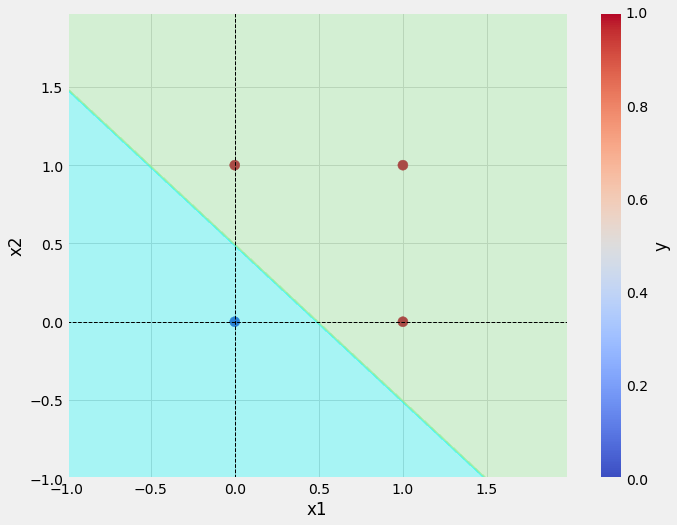

In [59]:
save_plot(df=df_OR, model=model_or, filename="or.png")

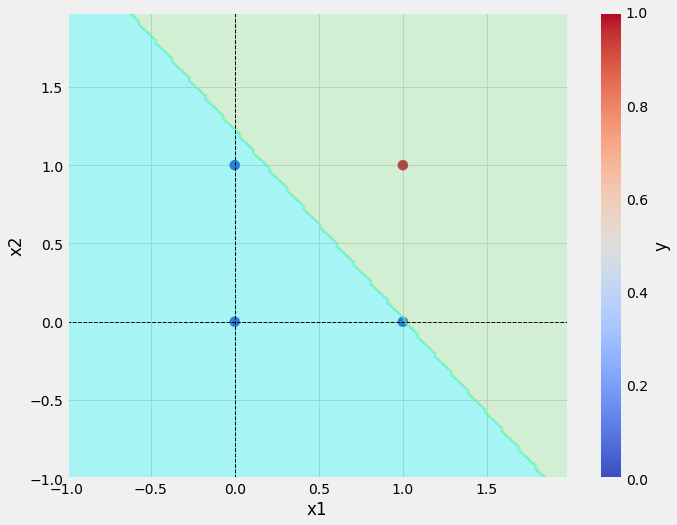

In [60]:
save_plot(df=df_AND, model=model_and, filename="and.png")

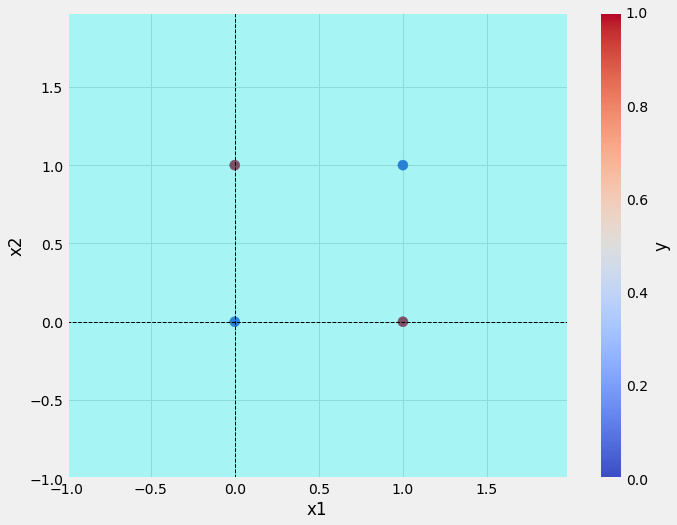

In [62]:
save_plot(df=df_XOR, model=model_xor, filename="xor.png")